<a href="https://colab.research.google.com/github/dananjarukshan/ML_SLIIT_Course/blob/main/ML_SLIIT_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to Google Drive

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Relevnt Packages.

In [25]:
# Step 2: Import pandas
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

Coose file path

In [26]:
# Step 3: Load the CSV file
file_path = '/content/drive/My Drive/Colab Notebooks/SLIIT_ML_course_CODES/Final_Project/Mobile_Price_Classification.csv'
df = pd.read_csv(file_path)


In [27]:
df.head()  # selecting first five rows in data set.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Split into features (X) and target (Y)

In [28]:
x = df.drop('price_range', axis = 1)
y = df['price_range']

# Step 4: Split into training and testing sets (75% train, 25% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Step 5: Check the shapes to confirm the split
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)


Training set shape: (1500, 20)
Testing set shape: (500, 20)


**Normalize (Scale) the Features**

ANN models perform better with
normalized input.

StandardScaler scales all features so they have a mean = 0 and standard deviation = 1.

In [29]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Build the ANN Model**

1. This creates a Sequential ANN model with:

  Input Layer + 1st Hidden Layer

    8 neurons

    relu activation function
    
    input_shape=(X_train.shape[1],) sets the number of input features.





2nd Hidden Layer

*   4 neurons
*   relu activation again.



Output Layer

* 1 neuron (binary classification)

* sigmoid outputs probability between 0 and 1.

In [30]:
model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the Model**

* adam: Optimizer that adjusts weights during training.

* binary_crossentropy: Used for binary classification (2 classes).

* accuracy: Tracks how often predictions are correct.

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Setup a Callback to Save Weights**

* This will save the best model weights to a file called ann_weights.h5 during training.

* save_best_only=True: Only saves if validation accuracy improves.

In [32]:
checkpoint = ModelCheckpoint('ann_weights.weights.h5', save_weights_only=True, save_best_only=True, verbose=1)


**Train the Model**

* epochs=50: The dataset is passed through the model 50 times.

* batch_size=32: Model processes 32 samples at a time before updating weights.

* validation_data: Allows monitoring accuracy on test data after each epoch.

* callbacks: Enables automatic saving of best weights.



In [33]:
model.fit(x_train,y_train,epochs=100, batch_size=32, validation_data=(x_test,y_test), callbacks=[checkpoint])


Epoch 1/100
25/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4948 - loss: 0.7519
Epoch 1: val_loss improved from inf to 0.72416, saving model to ann_weights.weights.h5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4801 - loss: 0.7493 - val_accuracy: 0.4720 - val_loss: 0.7242
Epoch 2/100
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4706 - loss: 0.7146 
Epoch 2: val_loss improved from 0.72416 to 0.70986, saving model to ann_weights.weights.h5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4732 - loss: 0.7134 - val_accuracy: 0.4960 - val_loss: 0.7099
Epoch 3/100
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5070 - loss: 0.6969
Epoch 3: val_loss improved from 0.70986 to 0.70170, saving model to ann_weights.weights.h5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5060 - loss: 0.6970 - val_accuracy: 0.5120 - val_loss: 0.7017
Epoch 4/100
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5268 - loss: 0.6924
Epoch 4: val_loss improved from 0.70170 to 0.

**Save the Full Model**

* Saves the entire model (architecture + weights) in HDF5 format.

* Useful for later loading without needing to rebuild the model manually.

In [34]:
model.save('ann_model.h5')


----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


**Evaluate the Model on Test Data**
* This gives you the overall accuracy and loss on the test set:

In [35]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8951 - loss: 0.2479 
Test Loss: 0.2671
Test Accuracy: 0.8880


**Make Predictions on the Test Set**

In [36]:
predictions = model.predict(x_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


**Convert Probabilities to Class Labels (0 or 1)**

In [37]:
predicted_classes = (predictions > 0.5).astype(int)


**Compare Predicted vs Actual Labels**

In [38]:
for i in range(10):  # Show first 10 predictions
    print(f"Actual: {y_test.values[i]}, Predicted: {predicted_classes[i][0]}, Probability: {predictions[i][0]:.2f}")

Actual: 0, Predicted: 0, Probability: 0.02
Actual: 0, Predicted: 0, Probability: 0.00
Actual: 1, Predicted: 1, Probability: 0.93
Actual: 1, Predicted: 1, Probability: 0.97
Actual: 1, Predicted: 1, Probability: 0.93
Actual: 1, Predicted: 1, Probability: 0.76
Actual: 0, Predicted: 0, Probability: 0.49
Actual: 0, Predicted: 0, Probability: 0.00
Actual: 1, Predicted: 1, Probability: 0.90
Actual: 1, Predicted: 1, Probability: 0.77


**Check Overall Prediction Distribution**
* To see how many were predicted as class 0 or 1:

In [39]:
unique, counts = np.unique(predicted_classes, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(226), np.int64(1): np.int64(274)}


**Check Min/Max of Prediction Probabilities**
* This tells you the range of the ANN's confidence on test data.



In [40]:
print("Min probability:", predictions.min())
print("Max probability:", predictions.max())


Min probability: 5.9477227e-08
Max probability: 0.99999833


**Plot Training & Validation Accuracy/Loss**

Epoch 1/50
25/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9678 - loss: 0.1476 
Epoch 1: val_loss improved from 0.26709 to 0.26340, saving model to ann_weights.weights.h5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9616 - loss: 0.1527 - val_accuracy: 0.8880 - val_loss: 0.2634
Epoch 2/50
26/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9674 - loss: 0.1597   
Epoch 2: val_loss improved from 0.26340 to 0.25971, saving model to ann_weights.weights.h5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9635 - loss: 0.1570 - val_accuracy: 0.8940 - val_loss: 0.2597
Epoch 3/50
25/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9544 - loss: 0.1700 
Epoch 3: val_loss improved from 0.25971 to 0.25602, saving model to ann_weights.weights.h5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9551 - loss: 0.1647 - val_accuracy: 0.8980 - val_loss: 0.2560
Epoch 4/50
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9703 - loss: 0.1293 
Epoch 4: val_loss improved from 0.25602 

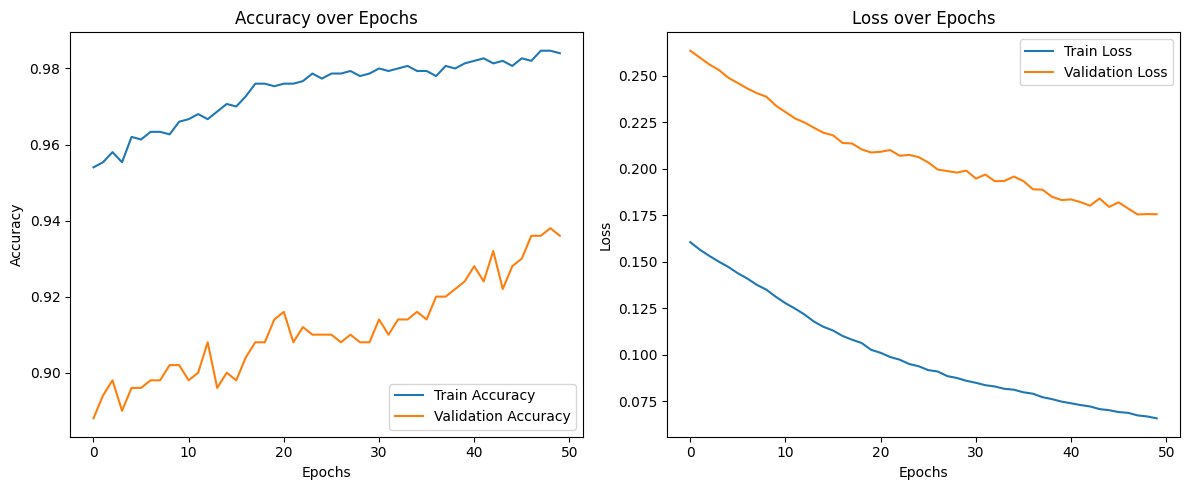

In [41]:
import matplotlib.pyplot as plt

# Train the model with output history
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint]
)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Confusion Matrix**

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


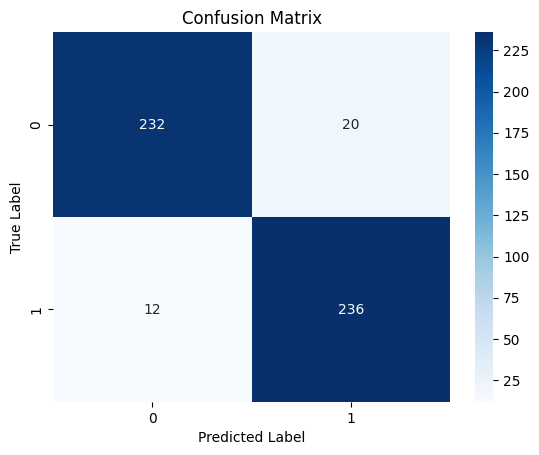

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Predict and convert to binary class
predictions = model.predict(x_test)
predicted_classes = (predictions > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**ROC curve**

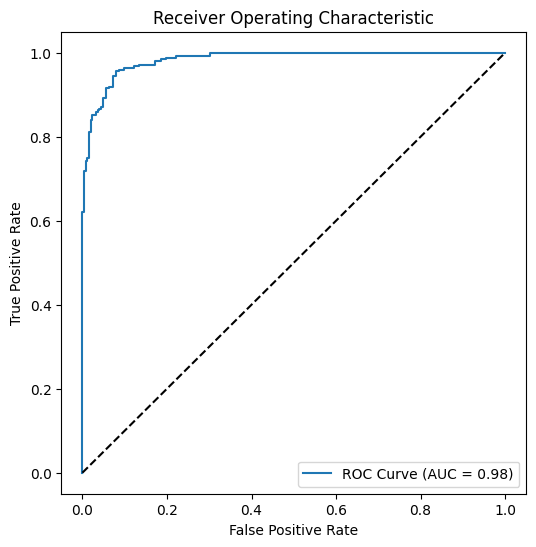

In [43]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
